# Machine Learning Algorithms from Scratch
This notebook demonstrates the implementation and testing of various ML algorithms built from scratch.

The algorithm classes are imported from the `./algorithms` folder.

In [1]:
# Import all standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import sklearn utilities for data and evaluation
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score, r2_score

# Import our custom algorithms from the 'algorithms' folder
from algorithms.linear_regression import LinearRegression
from algorithms.logistic_regression import LogisticRegression
from algorithms.naive_bayes import NaiveBayes
from algorithms.perceptron import Perceptron
from algorithms.svm import SVM

## 1. Linear Regression

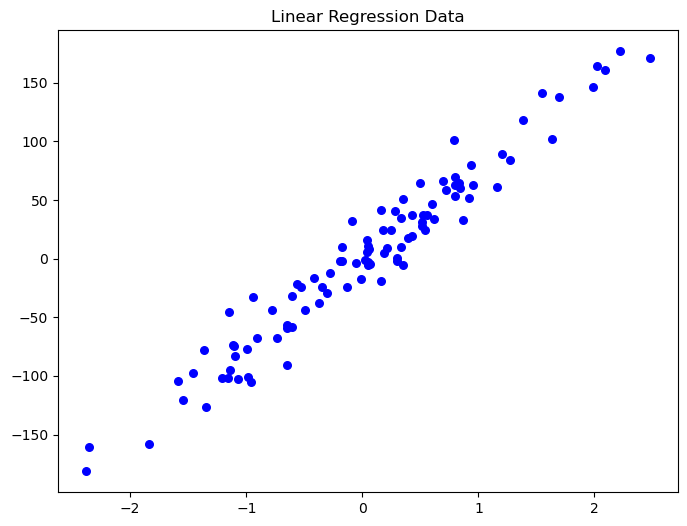

MSE: 305.7719958301902
R² Score: 0.9247520464311005


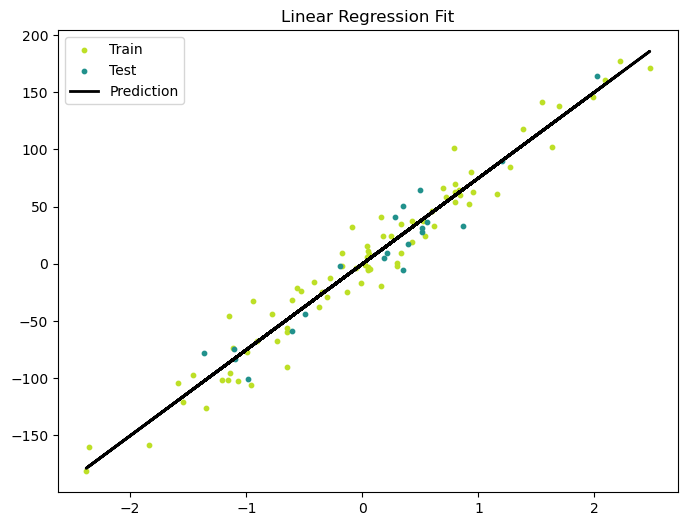

In [2]:
# Generate sample data
x, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

# Plot the data
fig = plt.figure(figsize=(8,6))
plt.scatter(x[:,0], y, color='b', marker='o', s=30)
plt.title("Linear Regression Data")
plt.show()

# Train our model
regressor = LinearRegression(lr=0.01)
regressor.fit(x_train, y_train)
predictions = regressor.predict(x_test)

# Define a simple MSE function
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Calculate and print performance
mse_value = mse(y_test, predictions)
r2_value = r2_score(y_test, predictions)
print(f"MSE: {mse_value}")
print(f"R² Score: {r2_value}")

# Plot the regression line
y_pred_line = regressor.predict(x)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
plt.scatter(x_train, y_train, color=cmap(0.9), s=10, label='Train')
plt.scatter(x_test, y_test, color=cmap(0.5), s=10, label='Test')
plt.plot(x, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.legend()
plt.title("Linear Regression Fit")
plt.show()

## 2. Logistic Regression

In [3]:
# Load breast cancer dataset
df = datasets.load_breast_cancer()
x, y = df.data, df.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

# Train and evaluate
clf = LogisticRegression(lr=0.0001, num_iter=1000)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)

print("LR classification accuracy:", accuracy_score(y_test, predictions))

LR classification accuracy: 0.9298245614035088


## 3. Naive Bayes

In [4]:
# Load Iris dataset
X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train and evaluate
nb = NaiveBayes()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print("Naive Bayes Accuracy on Iris:", accuracy_score(y_test, y_pred))

Naive Bayes Accuracy on Iris: 0.9777777777777777


## 4. Perceptron

Accuracy: 0.075


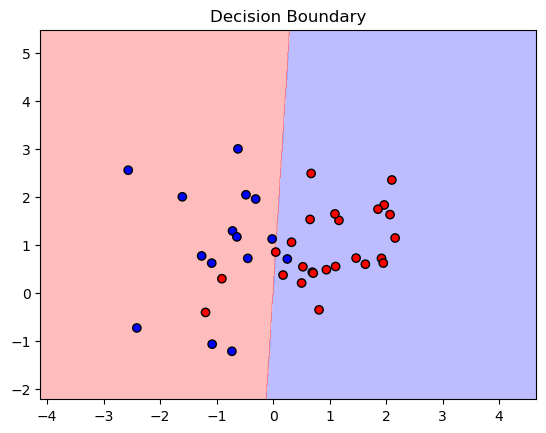

In [7]:
# ====== Test Perceptron ======
# Generate simple binary dataset
from sklearn.datasets import make_classification


X, y = make_classification(n_samples=200, n_features=2,
                           n_classes=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Train perceptron
clf = Perceptron(learning_rate=0.01, n_iters=10000)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# ====== Visualization ======
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr', edgecolors='k')
plt.title("Decision Boundary")
plt.show()

## 5. Support Vector Machine (SVM)

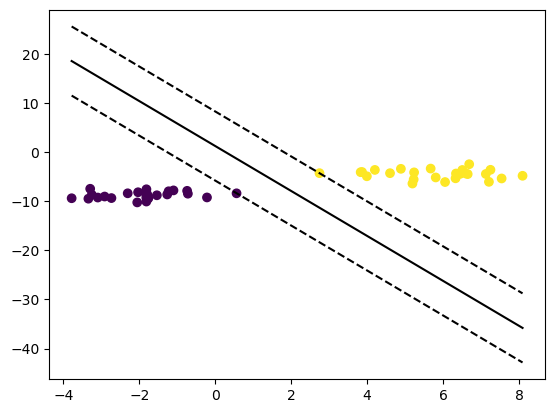

In [8]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# create dataset
X, y = make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)  # convert labels

# train SVM
clf = SVM()
clf.fit(X, y)
predictions = clf.predict(X)

# plotting decision boundary
def plot_hyperplane(X, y, clf):
    fig, ax = plt.subplots()
    plt.scatter(X[:,0], X[:,1], marker='o', c=y)

    x0_1 = np.amin(X[:,0])
    x0_2 = np.amax(X[:,0])

    x1_1 = (-clf.w[0] * x0_1 - clf.b) / clf.w[1]
    x1_2 = (-clf.w[0] * x0_2 - clf.b) / clf.w[1]

    ax.plot([x0_1, x0_2], [x1_1, x1_2], 'k')

    # margins
    x1_1_m = (-clf.w[0] * x0_1 - clf.b + 1) / clf.w[1]
    x1_2_m = (-clf.w[0] * x0_2 - clf.b + 1) / clf.w[1]
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], 'k--')

    x1_1_m = (-clf.w[0] * x0_1 - clf.b - 1) / clf.w[1]
    x1_2_m = (-clf.w[0] * x0_2 - clf.b - 1) / clf.w[1]
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], 'k--')

    plt.show()

plot_hyperplane(X, y, clf)